In [1]:
train_df <- read.csv("./Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [4]:
# 문제점 1) factor 여러개 2) 891개의 데이터인데 일부 컬럼의 데이터 개수와 맞지않음(중복가능성) 3) NA or 이상치 존재

### 컬럼 내용 확인
- Survived : 생존여부 , 0 = 사망, 1 = 생존          
- Pclass : 티켓등급, 1= 1등급객실 , 2 = 2등급객실, 3 = 3등급객실         
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수         
- Parch : 함께 탑승한 부모, 자식의 수             
- Fare : 운임          
- Cabin : 객실 번호         
- Embarked : 탑승항구, C = Chersbourg, Q = Queenstown, S= Southampton      

In [5]:
# 각 컬럼별 NA 확인

sum(is.na(train_df))
colSums(is.na(train_df)) # 컬럼별 합계 구하기 sol 1) for문 사용    sol 2) colSums()사용

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [6]:
177/891 # NA 값을 다른 데이터를 대체하기에는 정보가 부족 => Age column을 사용하려면 177명을 제외하고 분석 
891-177

[1] 0.1986532

[1] 714

In [7]:
# train_df$Age가 NA인 것 빼고 데이터셋 만들기

head(subset(train_df,!is.na(train_df$Age)))
nrow(subset(train_df,!is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [8]:
# Survived 기준으로 Dataset 정렬
library(dplyr)

train_df <- arrange(train_df,Survived)
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [9]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [10]:
# 정렬된 크기 확인하기

dim(train_df)

[1] 891  12

# Target Column : Survived 분석 및 확인

In [11]:
table(train_df$Survived) # 문제점 => 0과 1의 비율이 다름 


  0   1 
549 342 

In [12]:
# Survived(Target Column)의 생존과 사망 Count 확인 및 비율 계산하기

# 사망자수
# sol 1)
nrow(subset(train_df,Survived == 0))
# sol 2)
table(train_df$Survived)[1]

# 생존자수
# sol 1)
nrow(subset(train_df,Survived == 1))
# sol 2)
table(train_df$Survived)[2]

# 생존자수의 비율
nrow(subset(train_df,Survived == 1)) / nrow(train_df)

[1] 549

0 
549

[1] 342

1 
342

[1] 0.3838384

In [13]:
# Target 균등 Featrue는 특징이 있어야하므로 균등하면 안됨

In [14]:
library(plotrix)

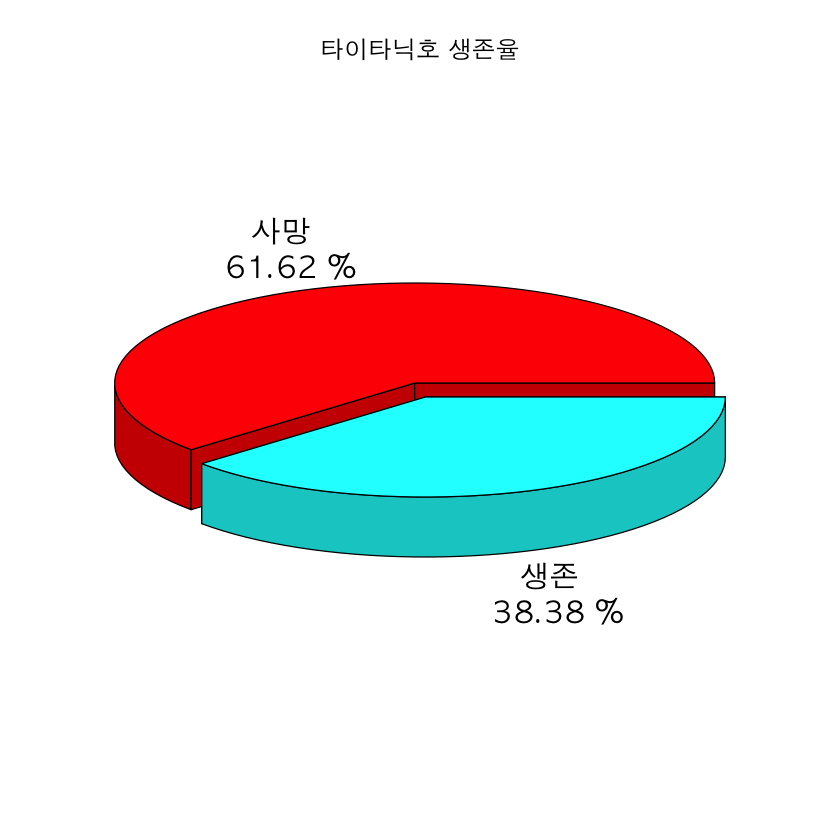

In [15]:
# 생존과 사망 비율을 3D Pie chart로 생성

options(warn = -1)
par(family = "AppleGothic")

survP <- nrow(subset(train_df,Survived == 1)) / nrow(train_df)
deadP <- nrow(subset(train_df,Survived == 0)) / nrow(train_df)

data <- c(deadP,survP)
name <- c("사망","생존")
ratio <- c((round(deadP*100,2)),(round(survP*100,2)))
label <- paste(name,"\n",ratio,"%")

pie3D(data,
      main = "타이타닉호 생존율",
      labels = label,
      explode = 0.05
     )

[1] 549

[1] 342

[1] 549 342

[1] 61.62 38.38

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

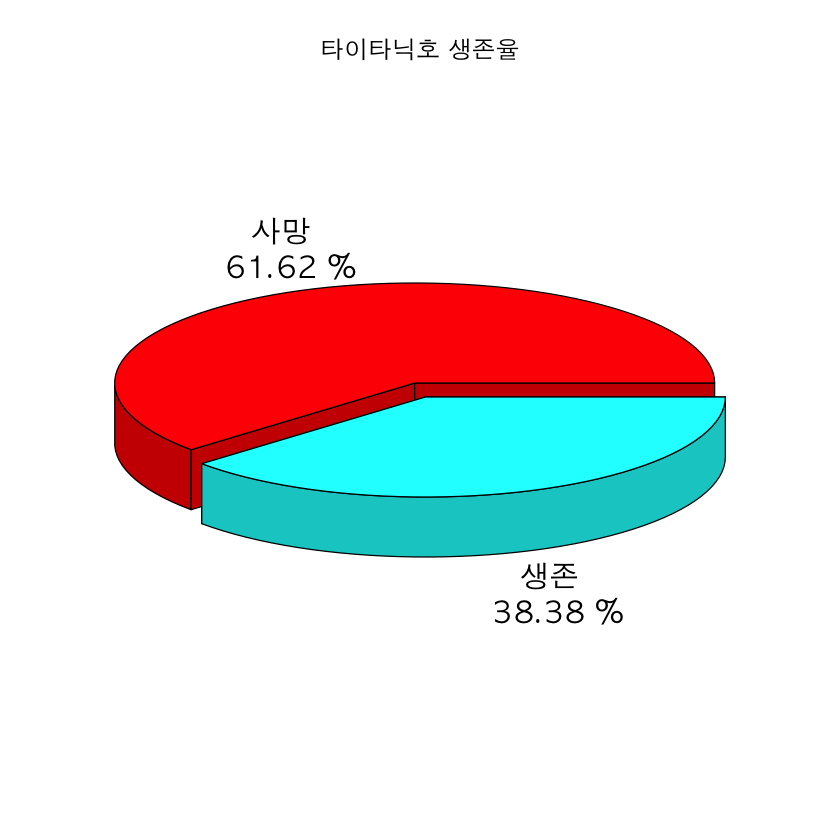

In [16]:
# other source
deathCount <- sum(train_df$Survived == 0) ; deathCount
liveCount <- sum(train_df$Survived == 1) ; liveCount

SurvivedVector <- c(deathCount,liveCount)
SurvivedVector

ratio <- round(SurvivedVector / sum(SurvivedVector) *100 ,2) ; ratio
label <- paste(c("사망","생존"),"\n",ratio,"%");label

options(warn = -1)
par(family = "AppleGothic")
pie3D(SurvivedVector,
      main = "타이타닉호 생존율",
      labels = label,
      explode = 0.05
     )

[1] 549

[1] 342

[1] 549 342

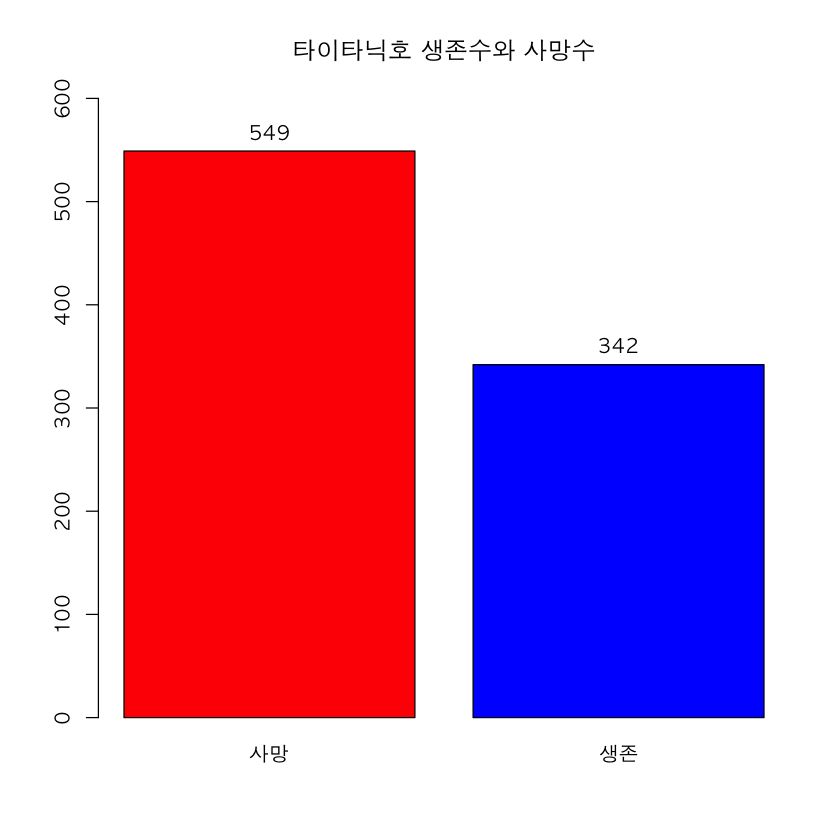

In [17]:
# 생존수와 사망수 막대그래프로 나타내기

deathCount <- sum(train_df$Survived == 0) ; deathCount
liveCount <- sum(train_df$Survived == 1) ; liveCount

SurvivedVector <- c(deathCount,liveCount)
SurvivedVector

par(family = "AppleGothic")
bp <- barplot(SurvivedVector,
        names = c("사망","생존"), # 컬럼 이름 , xlab은 하나만 쓸수 있음
        col = c("red","blue"),
        main = "타이타닉호 생존수와 사망수",
        ylim = c(0,600)
       )
text(bp,SurvivedVector,SurvivedVector,pos=3)

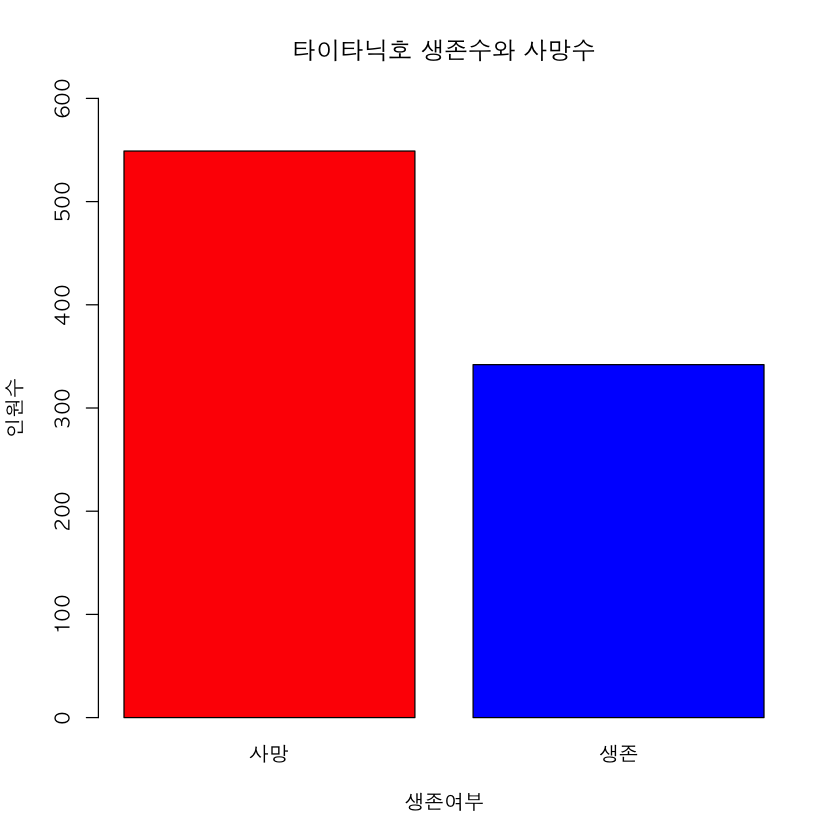

In [18]:
# other source

par(family = "AppleGothic")
barplot(table(train_df$Survived),
        main = "타이타닉호 생존수와 사망수",
        col = c("red","blue"),
        xlab = "생존여부",
        ylab = "인원수",
        ylim = c(0,600),
        names = c("사망","생존")
       )

> Target Column으로 Survived를 선정

---
# Feature Column 찾기

In [19]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex컬럼 확인

In [20]:
# Sex 컬럼 분류 확인

unique(train_df$Sex)

[1] male   female
Levels: female male

In [21]:
# 여성과 남성의 인원 확인

femaleCount <- nrow(subset(train_df,Sex=="female"))
femaleCount
maleCount <- nrow(subset(train_df,Sex=="male"))
maleCount

[1] 314

[1] 577

In [22]:
# 여성의 생존수와 사망수

femaleSurvive <- nrow(subset(train_df,(Sex=="female")&(Survived==1)))
femaleSurvive
femaleDeath <- nrow(subset(train_df,(Sex=="female")&(Survived==0)))
femaleDeath

[1] 233

[1] 81

In [23]:
# 남성의 생존수와 사망수

maleSurvive <- nrow(subset(train_df,(Sex=="male")&(Survived==1)))
maleSurvive
maleDeath <- nrow(subset(train_df,(Sex=="male")&(Survived==0)))
maleDeath

[1] 109

[1] 468

In [24]:
# 여성의 생존율과 사망율

cat("여성의 생존율 : ", round(femaleSurvive / femaleCount*100,2),"%","\n")
cat("여성의 사망율 : ", round(femaleDeath / femaleCount*100,2),"%","\n")

여성의 생존율 :  74.2 % 
여성의 사망율 :  25.8 % 


In [25]:
# 남성의 생존율과 사망율

cat("남성의 생존율 : ", round(maleSurvive / maleCount*100,2),"%","\n")
cat("남성의 사망율 : ", round(maleDeath / maleCount*100,2),"%","\n")

남성의 생존율 :  18.89 % 
남성의 사망율 :  81.11 % 


> Sex 컬럼은 Feature로 적합      
> [Surivived] <- [Sex]

In [26]:
# Feature 개수는 무조건 홀수로 최소 3개는 있어야함 

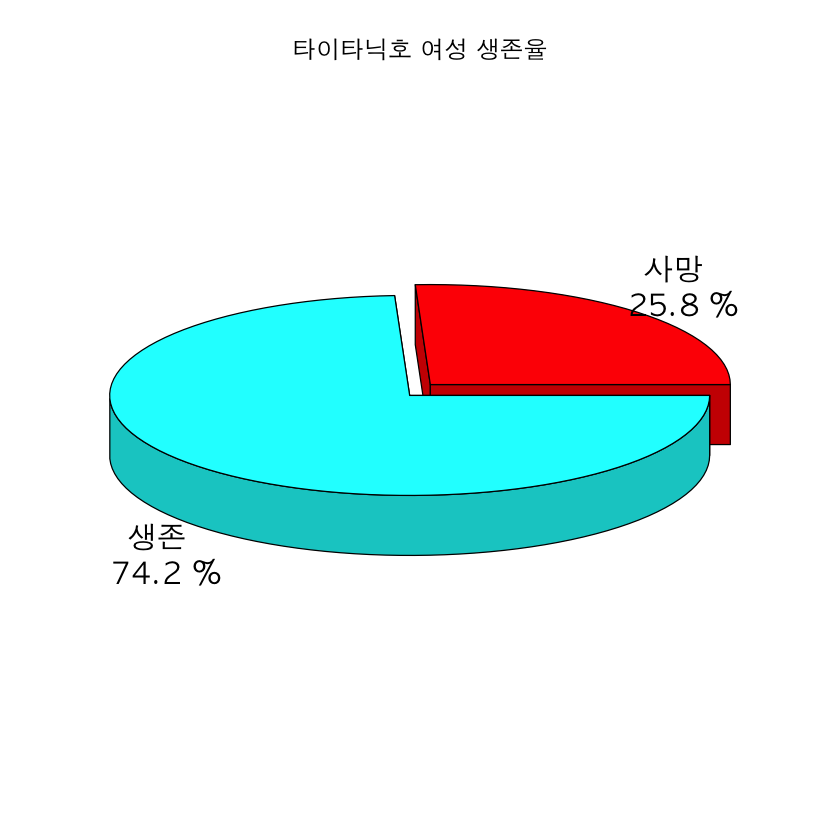

In [27]:
# 타이타닉호 여성 생존율 3D Pie Chart 생성

Female_ratio <- c(round(femaleDeath / femaleCount*100,2),
                  round(femaleSurvive / femaleCount*100,2))
name_col <- c("사망","생존")
label <- paste(name_col,"\n",Female_ratio,"%")

par(family = "AppleGothic")
pie3D(Female_ratio,
      main = "타이타닉호 여성 생존율",
      labels = label,
      explode = 0.05
     )

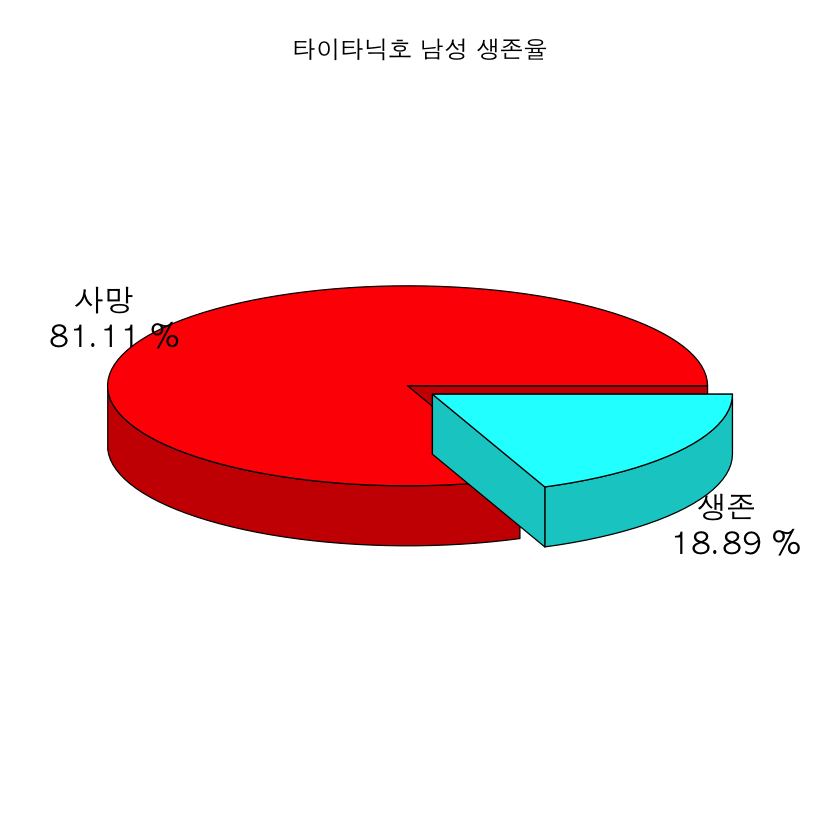

In [28]:
# 타이타닉호 남성 생존율 3D Pie Chart 생성

male_ratio <- c(round(maleDeath / maleCount*100,2),
                  round(maleSurvive / maleCount*100,2))
name_col1 <- c("사망","생존")
label1 <- paste(name_col,"\n",male_ratio,"%")

par(family = "AppleGothic")
pie3D(male_ratio,
      main = "타이타닉호 남성 생존율",
      labels = label1,
      explode = 0.05
     )

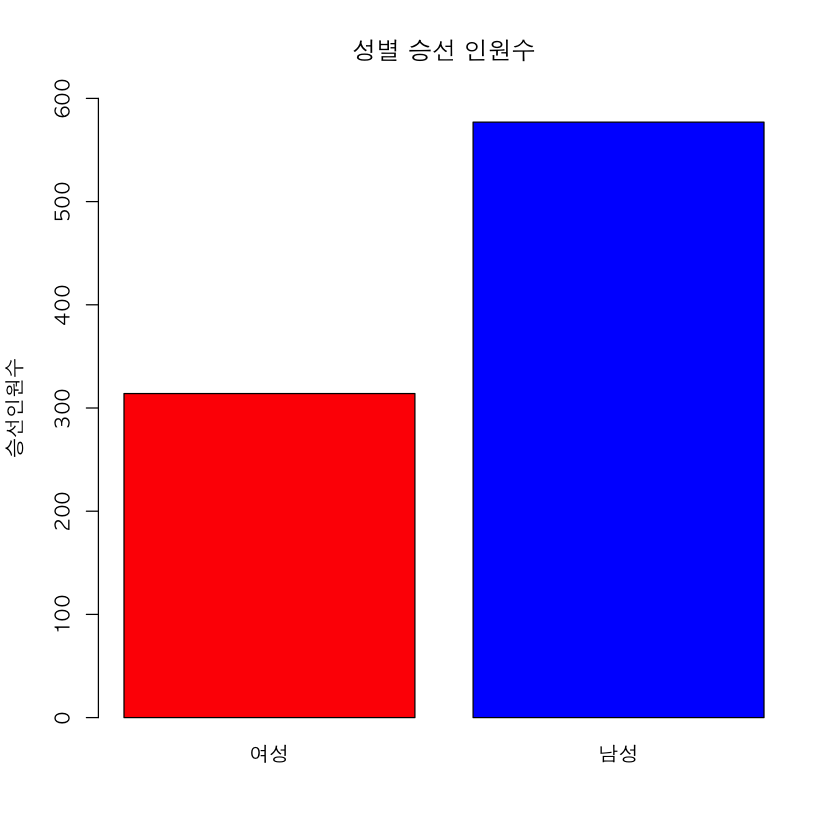

In [29]:
# 성별 승선 인원수

par(family = "AppleGothic")
barplot(c(femaleCount,maleCount),
        main = "성별 승선 인원수",
        ylab = "승선인원수",
        col = c("red","blue"),
        names = c("여성","남성"),
        ylim = c(0,600)
       )

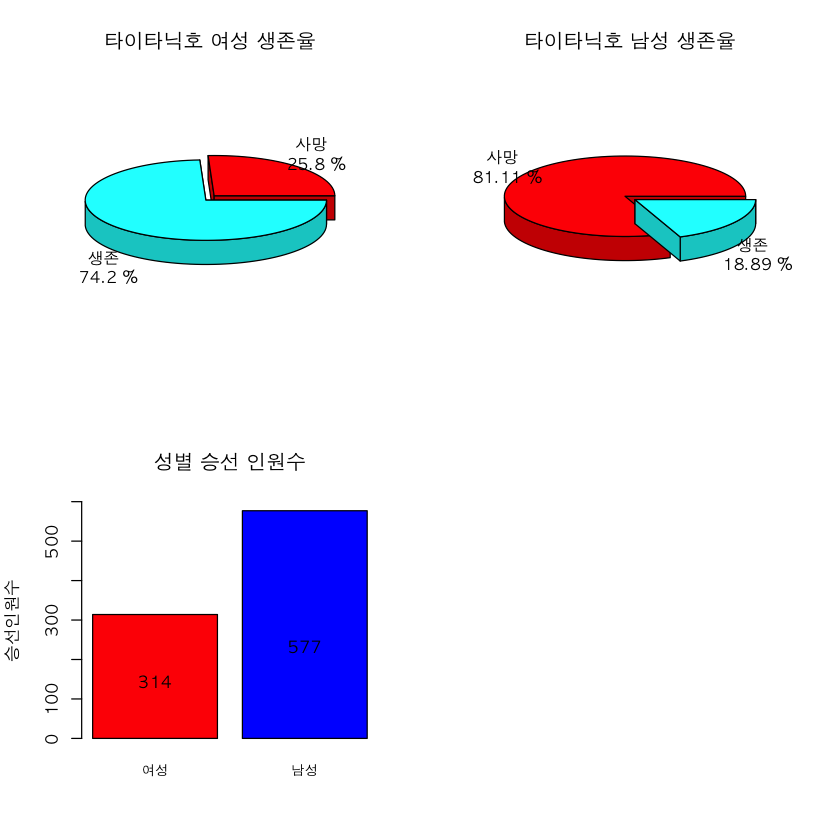

In [30]:
par(mfrow = c(2,2) , family = "AppleGothic")
pie3D(Female_ratio,
      main = "타이타닉호 여성 생존율",
      labels = label,
      explode = 0.05,
      labelcex = 0.8
     )
pie3D(male_ratio,
      main = "타이타닉호 남성 생존율",
      labels = label1,
      explode = 0.05,
      labelcex = 0.8
     )
bp <- barplot(c(femaleCount,maleCount),
        main = "성별 승선 인원수",
        ylab = "승선인원수",
        col = c("red","blue"),
        names = c("여성","남성"),
        ylim = c(0,600),
        cex.name= 0.8
       )
text(bp,c(femaleCount,maleCount)/3,c(femaleCount,maleCount),pos=3)

In [31]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급분석

In [32]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [33]:
# 각 객실의 성별 별 생존율

result = c()
for (s in c("female","male")){
    
    for(i in 1:3){
        class_surv <- nrow(subset(train_df,(Survived==1)&(Sex==s)&(Pclass==i)))
        class_sex <- nrow(subset(train_df,(Pclass==i)&(Sex==s)))
        cat(i,"등 객실의",ifelse(s=="female","여성","남성"),"생존율은",class_surv,"/"
        ,class_sex,",",round(class_surv/class_sex*100,2),"%","\n")
        
        result <- append(result,round(class_surv/class_sex*100,2))
    }
    cat("---------------------------------------------------------------------------\n")
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
---------------------------------------------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
---------------------------------------------------------------------------


In [34]:
for(i in c("female","male")){
    print(i)
}

[1] "female"
[1] "male"


In [35]:
result

[1] 96.81 92.11 50.00 36.89 15.74 13.54

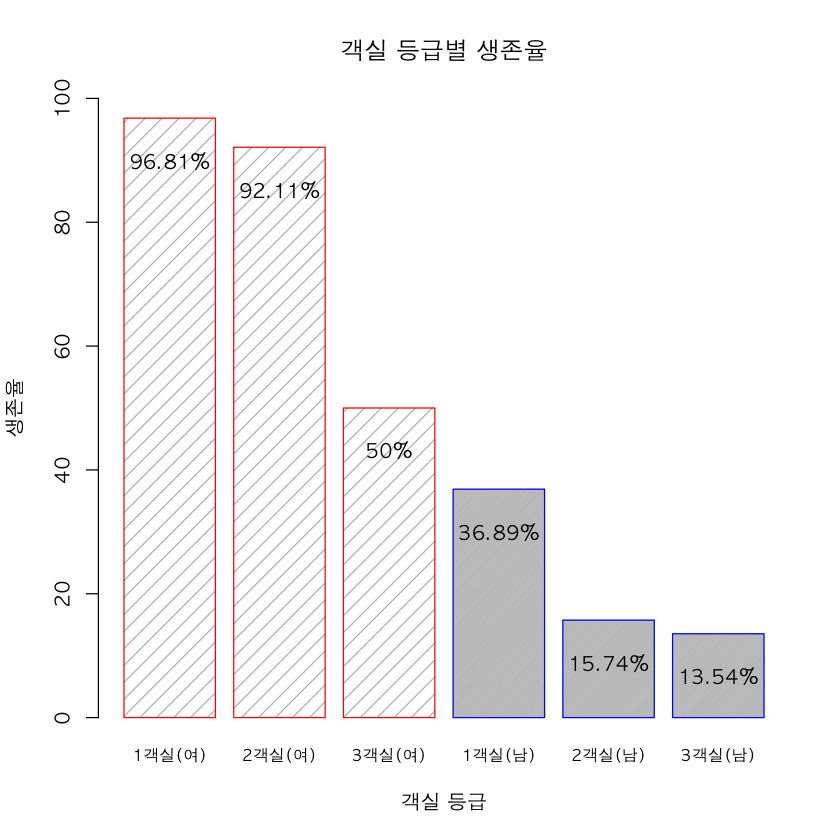

In [36]:
par(family = "AppleGothic")
bp <- barplot(result,
        main = "객실 등급별 생존율",
        border = c(rep("red",3),rep("blue",3)),
        density = c(rep(10,3),rep(100,3)),
        ylim = c(0,100),
        names = c("1객실(여)","2객실(여)","3객실(여)","1객실(남)","2객실(남)","3객실(남)"),
        cex.name= 0.8,
        ylab = "생존율",
        xlab = "객실 등급"
       )
text(bp, result-10, paste(result,"%",sep=""), pos=3)

> [Survived] <- [Sex,Pclass]

In [37]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked(항구의 위치)

In [38]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [39]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [40]:
unique(train_df$Embarked)

[1] S Q C  
Levels:  C Q S

In [41]:
# 빈칸의 데이터 찾기

subset(train_df,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [42]:
# 제일 많은 운임을 지불한 사람

subset(train_df,Fare==max(Fare))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [43]:
mean(train_df$Fare)

[1] 32.20421

In [44]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# S항구 탑승인원

nrow(subset(train_df,Embarked=="S")) # other sol) sum(train_df$Embarked == 'S') 
# C항구 탑승인원

nrow(subset(train_df,Embarked=="C")) # other sol) sum(train_df$Embarked == 'C') 
# Q항구 탑승인원

nrow(subset(train_df,Embarked=="Q")) # other sol) sum(train_df$Embarked == 'Q') 

[1] 644

[1] 168

[1] 77

> 빈 값 항구를 S 항구로 변경

In [45]:
# 연습을 위한 데이터셋 복제

train_df_T <- train_df

In [46]:
# 빈칸 항구 찾기 -1

subset(train_df_T,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [47]:
# 빈칸 항구 찾기 -2

train_df_T[train_df_T$Embarked=="",] # python에서는 subset()이 없으므로 이와같이 사용됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [48]:
# 빈칸 항구를 S항구로 변경 -1

# subset(train_df_T,Embarked=="")$Embarked <- c("S") 해당 방법 불가!!
train_df_T$Embarked <- ifelse(train_df_T$Embarked=="",'S',train_df_T$Embarked)

In [49]:
train_df_T[train_df_T$Embarked=="",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
# 빈칸 항구를 S항구로 변경 -2

train_df_T <- train_df

In [51]:
train_df_T[train_df_T$Embarked=="",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [52]:
train_df_T[train_df_T$Embarked=="",]$Embarked <- "S"

In [53]:
# 빈칸 항구를 S항구로 변경 -3

train_df_T <- train_df

In [54]:
train_df_T$Embarked[train_df_T$Embarked==""] <- "S"

In [55]:
train_df_T[train_df_T$Embarked=="",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [56]:
train_df$Embarked[train_df$Embarked==""] <- "S"

In [57]:
sum(train_df$Embarked=="S")

[1] 646

In [58]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [59]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


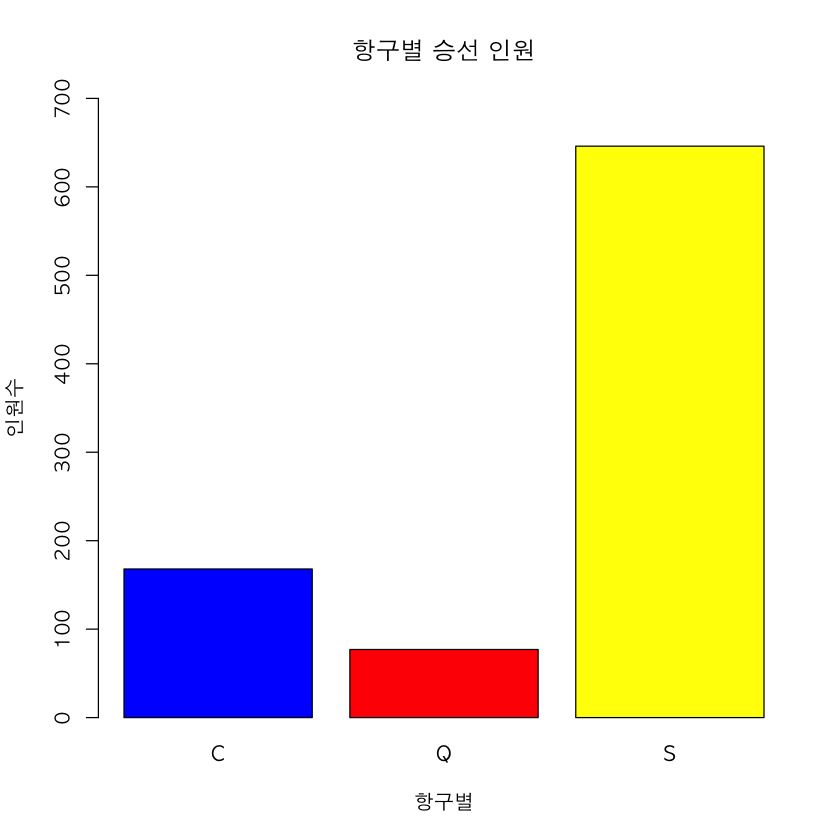

In [60]:
# 항구별 승선 인원

emba <- table(train_df$Embarked)

par(family = "AppleGothic")
barplot(emba,
        main = "항구별 승선 인원",
        col = c("blue","red","yellow"),
        ylim = c(0,700),
        xlab = "항구별",
        ylab = "인원수"
       )

In [61]:
t(table(train_df$Embarked,train_df$Sex))

        
           C   Q   S
  female  73  36 205
  male    95  41 441

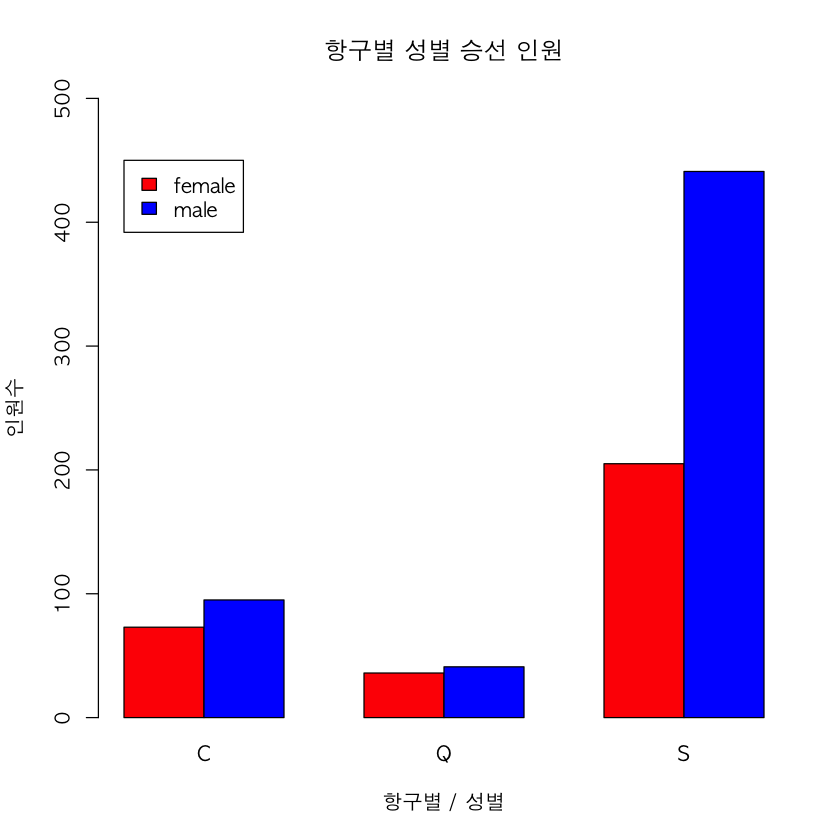

In [62]:
# 항구별 성별 승선 인원

par(family = "AppleGothic")
barplot(t(table(train_df$Embarked,train_df$Sex)),
        beside = T,
        col= c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별 / 성별",
        ylab = "인원수",
        main = "항구별 성별 승선 인원"
       )
legend(1,450,
       c("female","male"),
       fill = c("red","blue")
      )

In [63]:
t(table(train_df$Embarked,train_df$Survived))

   
      C   Q   S
  0  75  47 427
  1  93  30 219

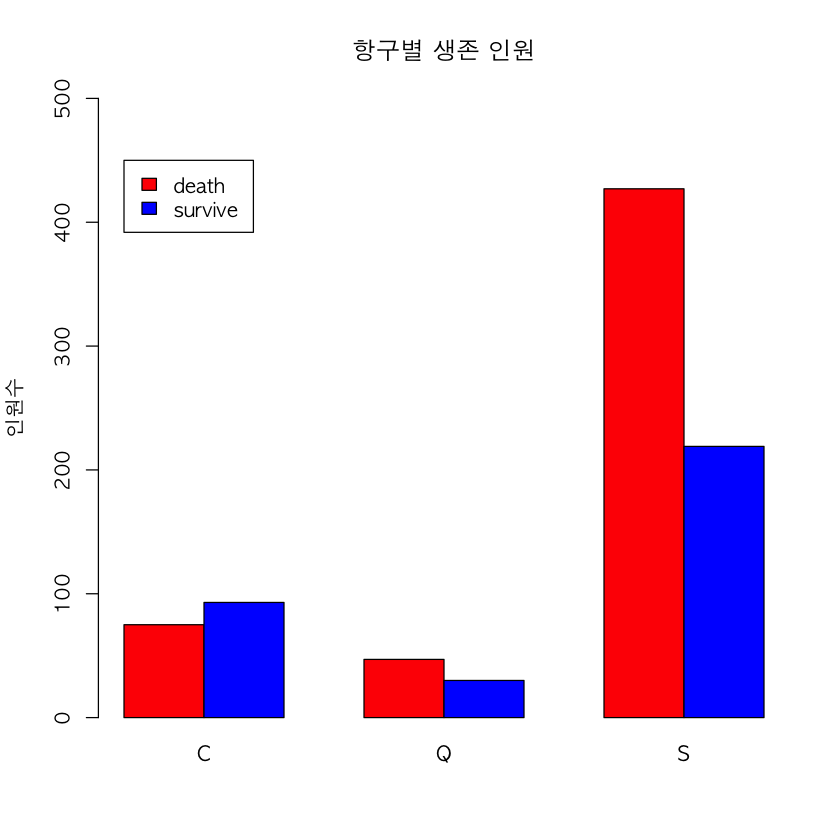

In [64]:
# 항구별 생존 인원

par(family = "AppleGothic")
barplot(t(table(train_df$Embarked,train_df$Survived)),
        beside = T,
        main = "항구별 생존 인원",
        col = c("red","blue"),
        ylab = "인원수",
        ylim = c(0,500)
       )
legend(1,450,
       c("death","survive"),
       fill = c("red","blue")
      )

In [65]:
# 해석 : C항구가 생존자가 더 많은 것으로 보아 1등급 손님들이 많이 탄 것으로 보여짐 

In [66]:
t(table(train_df$Embarked,train_df$Pclass))

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

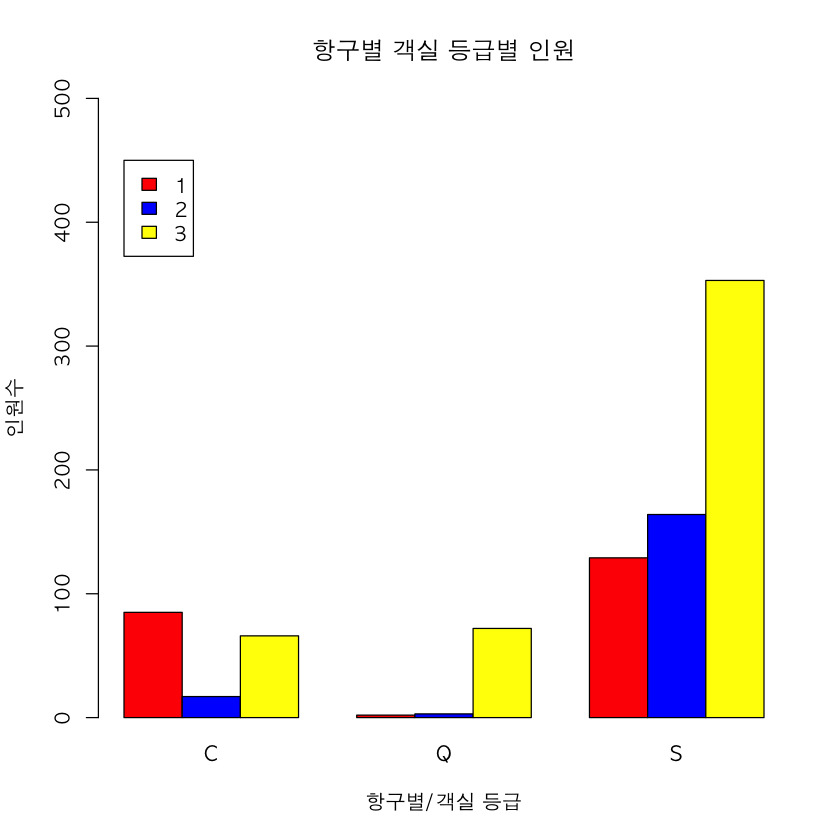

In [67]:
# 항구별 객실 등급별 인원

par(family = "AppleGothic")
barplot(t(table(train_df$Embarked,train_df$Pclass)),
        beside = T,
        main = "항구별 객실 등급별 인원",
        xlab = "항구별/객실 등급",
        ylab = "인원수",
        col = c("red","blue","yellow"),
        ylim = c(0,500)
       )
legend(1,450,
       c("1","2","3"),
       fill = c("red","blue","yellow")
      )

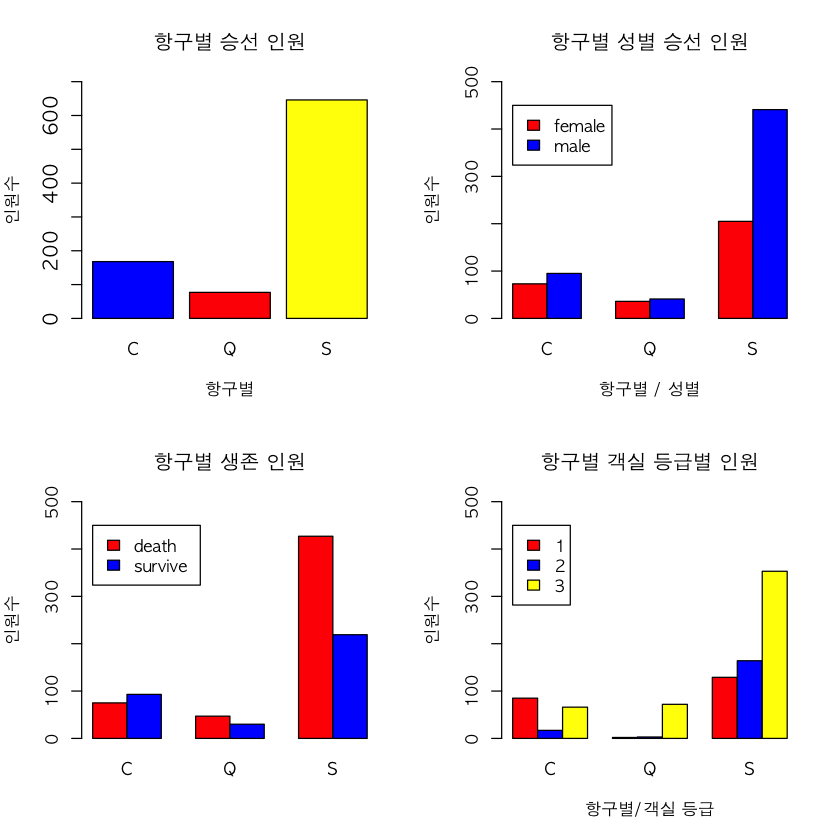

In [68]:
# 그래프 한눈에 보기

par(mfrow = c(2,2),family = "AppleGothic")
barplot(emba,
        main = "항구별 승선 인원",
        col = c("blue","red","yellow"),
        ylim = c(0,700),
        xlab = "항구별",
        ylab = "인원수",
        cex.axis=1.2
       )
barplot(t(table(train_df$Embarked,train_df$Sex)),
        beside = T,
        col= c("red","blue"),
        ylim = c(0,500),
        xlab = "항구별 / 성별",
        ylab = "인원수",
        main = "항구별 성별 승선 인원",
       )
legend(1,450,
       c("female","male"),
       fill = c("red","blue")
      )
barplot(t(table(train_df$Embarked,train_df$Survived)),
        beside = T,
        main = "항구별 생존 인원",
        col = c("red","blue"),
        ylab = "인원수",
        ylim = c(0,500)
       )
legend(1,450,
       c("death","survive"),
       fill = c("red","blue")
      )
barplot(t(table(train_df$Embarked,train_df$Pclass)),
        beside = T,
        main = "항구별 객실 등급별 인원",
        xlab = "항구별/객실 등급",
        ylab = "인원수",
        col = c("red","blue","yellow"),
        ylim = c(0,500)
       )
legend(1,450,
       c("1","2","3"),
       fill = c("red","blue","yellow")
      )

---
# RandomForest로 예측모델 생성

In [69]:
# 복사본
train_df_T <- train_df

In [70]:
# 예측을 위한 컬럼 확인

target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [71]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [72]:
head(train_df_T)
tail(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [73]:
# Sex컬럼 삭제

subset(train_df_T,select=-Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0
14,0,3,"Andersson, Mr. Anders Johan",39,1,5,347082,31.2750,,S,0
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",14,0,0,350406,7.8542,,S,1
17,0,3,"Rice, Master. Eugene",2,4,1,382652,29.1250,,Q,0
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",31,1,0,345763,18.0000,,S,1


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


In [74]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


### Embarked를 숫자로 전환

C= 0, S = 1 ,Q = 2 -> 맞긴 맞지만 좋은생각이 아니다.         
2 * S = Q ?
S + S = Q ?

### One-Hot Encoding 방법
C == [1,0,0]      
S == [0,1,0]      
Q == [0,0,1]       
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해진다.      
R은 내부적으로 1은 True, 0은 False로 인식함

In [75]:
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"

head(train_df_T[c("Embarked","Embarked_C","Embarked_S","Embarked_Q")])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [76]:
target_col = c("Survived","Pclass","SexCode","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [77]:
train_data <- train_df_T[,target_col]

In [78]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [79]:
# Sampling

set.seed(1234)
library(caret)

samp <- createDataPartition(train_data$Survived,p=0.7,list=F)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [80]:
# 학습용

data.train <- train_data[samp,]

In [81]:
str(data.train)

'data.frame':	624 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [82]:
# 검증용

data.test <- train_data[-samp,]

In [83]:
str(data.test)

'data.frame':	267 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 3 3 1 1 3 3 3 ...
 $ SexCode   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [84]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [85]:
# 학습시키기 

rf <- randomForest(Survived~.,data=data.train,ntree =100)

In [86]:
# 문제와 정답

x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [87]:
# 검증하기

pred <- predict(rf,x)
head(pred)

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

In [88]:
# sigmoid 함수 => 0.5기준으로 0,1만 출력 (주관식인 경우)

In [89]:
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0

In [90]:
mean(pred == y)

[1] 0.7790262

---
### Survived를 factor로 변환 후에 randomForest 실행

In [91]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [92]:
rf <- randomForest(Survived~.,data=data.train,ntree=100)

In [93]:
x <- subset(data.test,select = -Survived)
y <- data.test$Survived

In [94]:
pred <- predict(rf,x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [95]:
mean(pred == y)
table(pred,y)
table(y)

# 결과(y) 사망자 => 166 이지만 pred에서 예측하기로는 156명이므로 10명을 못 맞춤
# 그러나 결과(y) 생존자 => 101이지만 pred에서 예측하기로는 49명이므로 52명을 못 맞춤
# 즉,해당 AI는 생존자를 많이 맞추지 못하였으므로 좋지 않은 모델이다.

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

y
  0   1 
166 101 

In [96]:
library(nnet)
library(party)
library(e1071)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [97]:
set.seed(1234)

In [98]:
# 모델별로 비교해보기 

# 인공신경망 

result.n = c()
for(i in 1:5){
    model.n <- nnet(Survived ~ ., data = data.train, size=2) 
    pred.n <- predict(model.n, x,type="class")
    result.n <- append(result.n,mean(pred.n == y))
}
mean(result.n)
table(pred.n,y)

# ctree
result.c = c()
for(i in 1:5){
    model.c<- ctree(Survived ~ ., data = data.train) 
    pred.c <- predict(model.c, x)
    result.c <- append(result.c,mean(pred.c==y))
}
mean(result.c)
table(pred.c,y)

# svm

result.s = c()
for(i in 1:5){
    model.s <- svm(Survived ~ ., data = data.train) 
    pred.s <- predict(model.s, x)
    pred.s[pred.s<=0.5] <- 0
    pred.s[pred.s>0.5] <- 1
    result.s <- append(result.s,mean(pred.s == y))
}
mean(result.s)
table(pred.s,y)

# randomforest

result.r = c() 
for(i in 1:5){
    model.r <- randomForest(Survived ~ ., data = data.train) 
    pred.r <- predict(model.r,x)
    result.r <- append(result.r,mean(pred.r == y))
}
mean(result.r)
table(pred.r,y)

# 로지스틱 회귀

result.m = c()
for(i in 1:5){
    model.m<- multinom(Survived ~ ., data = data.train) 
    pred.m <- predict(model.m, x)
    result.m <- append(result.m,mean(pred.m==y))
    
}
mean(result.m)
table(pred.m,y)

# weights:  15
initial  value 434.685142 
iter  10 value 342.539198
iter  20 value 278.540270
iter  30 value 268.422771
iter  40 value 267.170877
iter  50 value 266.995850
iter  60 value 266.891249
iter  70 value 266.853453
iter  80 value 266.824101
iter  90 value 266.819309
iter 100 value 266.791063
final  value 266.791063 
stopped after 100 iterations
# weights:  15
initial  value 499.899169 
iter  10 value 305.746369
iter  20 value 305.075868
iter  30 value 305.071963
iter  40 value 305.068679
iter  50 value 305.067248
final  value 305.065389 
converged
# weights:  15
initial  value 422.634012 
iter  10 value 270.282744
iter  20 value 263.167683
iter  30 value 259.932852
iter  40 value 258.878312
iter  50 value 258.308974
iter  60 value 258.267388
iter  70 value 258.221298
iter  80 value 258.142565
iter  90 value 258.004333
iter 100 value 257.965856
final  value 257.965856 
stopped after 100 iterations
# weights:  15
initial  value 465.098268 
iter  10 value 269.111354
iter  20 valu

[1] 0.7782772

      y
pred.n   0   1
     0 156  49
     1  10  52

[1] 0.7790262

      y
pred.c   0   1
     0 156  49
     1  10  52

[1] 0.7790262

      y
pred.s   0   1
     0 156  49
     1  10  52

[1] 0.7790262

      y
pred.r   0   1
     0 156  49
     1  10  52

# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged


[1] 0.7715356

      y
pred.m   0   1
     0 135  30
     1  31  71

In [99]:
# # svm
# model.svm <- svm(Survived ~ ., data = data.train) 
# pred <- predict(model.nnet, x)
# pred[pred <=0.5] <- 0
# pred[pred >0.5] <- 1
# mean(pred == y)
# table(pred,y)

In [100]:
# randomforest : 0.779026217228464
# 인공신경망 : 0.779026217228464
# ctree : 0.779026217228464
# svm : 0.779026217228464
# 다중 로지스틱 회귀 : 0.771535580524345

# 일단 틀린것도 감안하였을때 다중 로지스틱 회귀가 그나마 낫다? 

In [101]:
testing <- train_data
testing$p1_f= testing$Pclass==1 & testing$SexCode==1
testing$p2_f= testing$Pclass==2 & testing$SexCode==1
testing$p3_f= testing$Pclass==3 & testing$SexCode==1
testing$p1_m= testing$Pclass==1 & testing$SexCode==0
testing$p2_m= testing$Pclass==2 & testing$SexCode==0
testing$p3_m= testing$Pclass==3 & testing$SexCode==0

In [102]:
testing <- testing[,-c(2,3)]
head(testing)

Survived,Embarked_C,Embarked_S,Embarked_Q,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [103]:
samp <- createDataPartition(testing$Survived,p=0.7,list=F)
testing.tr <- testing[samp,]
testing.test <- testing[-samp,]
x <- subset(testing.test,select=-Survived)
y <- testing.test$Survived

model.multinom <- multinom(Survived ~ ., data =testing.tr) 
pred <- predict(model.multinom, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  11 (10 variable)
initial  value 432.523841 
iter  10 value 275.935567
final  value 275.231117 
converged


[1] 0.7640449

    y
pred   0   1
   0 140  32
   1  31  64

In [104]:
head(train_df)
head(train_data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [105]:
testing2 <- train_df_T
testing2 <- subset(testing2,!is.na(testing2$Age))
table(testing2$Age)
# 나이별 컬럼 추가
testing2$애기 = testing2$Age<20
testing2$어른 = testing2$Age>=20&testing2$Age<40
testing2$노인 = testing2$Age>=40

# 가족 동행 컬럼 추가
testing2$가족 = apply(cbind(testing2$SibSp,testing2$Parch),1,sum)
# 클래스랑 성별 컬럼 추가
testing2$p1_f= testing2$Pclass==1 & testing2$SexCode==1
testing2$p2_f= testing2$Pclass==2 & testing2$SexCode==1
testing2$p3_f= testing2$Pclass==3 & testing2$SexCode==1
testing2$p1_m= testing2$Pclass==1 & testing2$SexCode==0
testing2$p2_m= testing2$Pclass==2 & testing2$SexCode==0
testing2$p3_m= testing2$Pclass==3 & testing2$SexCode==0


#testing2 <- testing2[,c(2,3,12:19)]
testing2 <- testing2[,c(2,13:25)]
head(testing2)


0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 

,Survived,SexCode,Embarked_C,Embarked_S,Embarked_Q,애기,어른,노인,가족,p1_f,p2_f,p3_f,p1_m,p2_m
1,0,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE
2,0,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,0,FALSE,FALSE,FALSE,FALSE,FALSE
4,0,0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,0,FALSE,FALSE,FALSE,TRUE,FALSE
5,0,0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,4,FALSE,FALSE,FALSE,FALSE,FALSE
6,0,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,0,FALSE,FALSE,FALSE,FALSE,FALSE
7,0,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,6,FALSE,FALSE,FALSE,FALSE,FALSE


In [106]:
set.seed(1234)
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged


[1] 0.7850467

    y
pred   0   1
   0 113  25
   1  21  55

In [107]:
# 나이별, 가족동행, 클래스랑 성별 컬럼 추가

# 1) 인공신경망
set.seed(1234)
result.nnet2 = c()
for(i in 1:5){
    model.nnet2 <- nnet(Survived~.,data=testing2.tr,size=2)
    pred.nnet <- predict(model.nnet2, x,type="raw")
    pred.nnet[pred.nnet<=0.5] <- 0
    pred.nnet[pred.nnet>0.5] <- 1
    result.nnet2 <- append(result.nnet2,mean(pred.nnet==y))
}
mean(result.nnet2)
table(pred.nnet,y)


# 2) 의사결정나무
set.seed(1234)
result.ctree2 = c()
for(i in 1:5){
    model.ctree2 <- svm(Survived~.,data=testing2.tr)
    pred.ctree <- predict(model.ctree2, x)
    pred.ctree[pred.ctree<=0.5] <- 0
    pred.ctree[pred.ctree>0.5] <- 1
    result.ctree2 <- append(result.ctree2,mean(pred.ctree==y))
}
mean(result.ctree2)
table(pred.ctree,y)


# 3) RandomForest
set.seed(1234)
result.rf2 = c()
for(i in 1:5){
    model.rf2 <- svm(Survived~.,data=testing2.tr)
    pred.rf <- predict(model.rf2, x)
    pred.rf[pred.rf<=0.5] <- 0
    pred.rf[pred.rf>0.5] <- 1
    result.rf2 <- append(result.rf2,mean(pred.rf==y))
}
mean(result.rf2)
table(pred.rf,y)


# 4) svm
set.seed(1234)
result.svm2 = c()
for(i in 1:5){
    model.svm2 <- svm(Survived~.,data=testing2.tr)
    pred.svm <- predict(model.svm2, x)
    pred.svm[pred.svm<=0.5] <- 0
    pred.svm[pred.svm>0.5] <- 1
    result.svm2 <- append(result.svm2,mean(pred.svm==y))
}
mean(result.svm2)
table(pred.svm,y)


# 5) 로즈스틱회귀분석
set.seed(1234)
result.multinom2 = c()
for(i in 1:5){
    model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
    pred.multinom <- predict(model.multinom2, x)
    pred.multinom[pred.multinom<=0.5] <- 0
    pred.multinom[pred.multinom>0.5] <- 1
    result.multinom2 <- append(result.multinom2,mean(pred.multinom==y))
}
mean(result.multinom2)
table(pred.multinom,y)

# weights:  31
initial  value 131.113045 
iter  10 value 84.936771
iter  20 value 72.728634
iter  30 value 66.387263
iter  40 value 65.893937
iter  50 value 65.717990
iter  60 value 65.650358
iter  70 value 65.474625
iter  80 value 65.404230
iter  90 value 65.386434
iter 100 value 65.235879
final  value 65.235879 
stopped after 100 iterations
# weights:  31
initial  value 139.980954 
iter  10 value 83.820314
iter  20 value 82.630406
iter  30 value 79.791195
iter  40 value 77.809081
iter  50 value 77.547843
iter  60 value 77.180656
iter  70 value 76.602646
iter  80 value 76.524731
iter  90 value 70.526065
iter 100 value 70.247089
final  value 70.247089 
stopped after 100 iterations
# weights:  31
initial  value 122.452422 
iter  10 value 80.374972
iter  20 value 65.407541
iter  30 value 62.141939
iter  40 value 61.799429
iter  50 value 61.708091
iter  60 value 61.691743
iter  70 value 61.646818
iter  80 value 61.636249
iter  90 value 61.622842
iter 100 value 61.618829
final  value 61.61

[1] 0.7943925

         y
pred.nnet   0   1
        0 110  19
        1  24  61

[1] 0.7897196

          y
pred.ctree   0   1
         0 115  26
         1  19  54

[1] 0.7897196

       y
pred.rf   0   1
      0 115  26
      1  19  54

[1] 0.7897196

        y
pred.svm   0   1
       0 115  26
       1  19  54

# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged
# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged
# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged
# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged
# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 213.877497
final  value 212.042570 
converged


[1] 0.7850467

             y
pred.multinom   0   1
            0 113  25
            1  21  55

In [108]:
testing2 <- train_df_T
testing2 <- subset(testing2,!is.na(testing2$Age))
# 나이별 컬럼 추가
testing2$p1_c = testing2$Age<20&testing2$Pclass==1
testing2$p2_c = testing2$Age<20&testing2$Pclass==2
testing2$p3_c = testing2$Age<20&testing2$Pclass==3
testing2$p1_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==1
testing2$p2_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==2
testing2$p3_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==3
testing2$p1_e = testing2$Age>=60&testing2$Pclass==1
testing2$p2_e = testing2$Age>=60&testing2$Pclass==2
testing2$p3_e = testing2$Age>=60&testing2$Pclass==3

# 가족 동행 컬럼 추가
testing2$가족 = apply(cbind(testing2$SibSp,testing2$Parch),1,sum)
table(testing2$가족)

# 승선지와 클래스 관련 컬럼 추가
# testing2$p1_C = testing2$Pclass==1 & testing2$Embarked_C == T
# testing2$p2_C = testing2$Pclass==2 & testing2$Embarked_C == T
# testing2$p3_C = testing2$Pclass==3 & testing2$Embarked_C == T
# testing2$p1_S = testing2$Pclass==1 & testing2$Embarked_S == T
# testing2$p2_S = testing2$Pclass==2 & testing2$Embarked_S == T
# testing2$p3_S = testing2$Pclass==3 & testing2$Embarked_S == T
# testing2$p1_Q = testing2$Pclass==1 & testing2$Embarked_Q == T
# testing2$p2_Q = testing2$Pclass==2 & testing2$Embarked_Q == T
# testing2$p3_Q = testing2$Pclass==3 & testing2$Embarked_Q == T

# 클래스랑 성별 컬럼 추가
testing2$p1_f= testing2$Pclass==1 & testing2$SexCode==1
testing2$p2_f= testing2$Pclass==2 & testing2$SexCode==1
testing2$p3_f= testing2$Pclass==3 & testing2$SexCode==1
testing2$p1_m= testing2$Pclass==1 & testing2$SexCode==0
testing2$p2_m= testing2$Pclass==2 & testing2$SexCode==0
testing2$p3_m= testing2$Pclass==3 & testing2$SexCode==0

colna <- c('Survived','가족','p1_c',
          'p2_c','p3_c','p1_a','p2_a','p3_a','p1_e','p2_e','p3_e','p1_f','p2_f','p3_f','p1_m','p2_m','p3_m'
#           ,'p1_C','p2_C','p3_C','p1_S','p2_S','p3_S','p1_Q','p2_Q','p3_Q')
           )
#testing2 <- testing2[,c(2,3,12:19)]
testing2 <- testing2[,colna]
head(testing2)


  0   1   2   3   4   5   6   7 
404 139  93  27  11  22  12   6 

,Survived,가족,p1_c,p2_c,p3_c,p1_a,p2_a,p3_a,p1_e,p2_e,p3_e,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
1,0,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,0,0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,0,4,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
7,0,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [109]:
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

In [110]:
# 클래스랑 나이별 컬럼, 가족동행 컬럼, 클래스랑 성별 컬럼 추가

# 1) 인공신경망
set.seed(1234)
result.nnet2 = c()
for(i in 1:5){
    model.nnet2 <- nnet(Survived~.,data=testing2.tr,size=2)
    pred.nnet <- predict(model.nnet2, x,type="raw")
    pred.nnet[pred.nnet<=0.5] <- 0
    pred.nnet[pred.nnet>0.5] <- 1
    result.nnet2 <- append(result.nnet2,mean(pred.nnet==y))
}
mean(result.nnet2)
table(pred.nnet,y)


# 2) 의사결정나무
set.seed(1234)
result.ctree2 = c()
for(i in 1:5){
    model.ctree2 <- svm(Survived~.,data=testing2.tr)
    pred.ctree <- predict(model.ctree2, x)
    pred.ctree[pred.ctree<=0.5] <- 0
    pred.ctree[pred.ctree>0.5] <- 1
    result.ctree2 <- append(result.ctree2,mean(pred.ctree==y))
}
mean(result.ctree2)
table(pred.ctree,y)


# 3) RandomForest
set.seed(1234)
result.rf2 = c()
for(i in 1:5){
    model.rf2 <- svm(Survived~.,data=testing2.tr)
    pred.rf <- predict(model.rf2, x)
    pred.rf[pred.rf<=0.5] <- 0
    pred.rf[pred.rf>0.5] <- 1
    result.rf2 <- append(result.rf2,mean(pred.rf==y))
}
mean(result.rf2)
table(pred.rf,y)


# 4) svm
set.seed(1234)
result.svm2 = c()
for(i in 1:5){
    model.svm2 <- svm(Survived~.,data=testing2.tr)
    pred.svm <- predict(model.svm2, x)
    pred.svm[pred.svm<=0.5] <- 0
    pred.svm[pred.svm>0.5] <- 1
    result.svm2 <- append(result.svm2,mean(pred.svm==y))
}
mean(result.svm2)
table(pred.svm,y)


# 5) 로즈스틱회귀분석
set.seed(1234)
result.multinom2 = c()
for(i in 1:5){
    model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
    pred.multinom <- predict(model.multinom2, x)
    pred.multinom[pred.multinom<=0.5] <- 0
    pred.multinom[pred.multinom>0.5] <- 1
    result.multinom2 <- append(result.multinom2,mean(pred.multinom==y))
}
mean(result.multinom2)
table(pred.multinom,y)

# weights:  37
initial  value 120.954612 
iter  10 value 69.578768
iter  20 value 65.595532
iter  30 value 64.926001
iter  40 value 62.140075
iter  50 value 61.388406
iter  60 value 61.154346
iter  70 value 61.142505
iter  80 value 61.130093
iter  90 value 61.068329
iter 100 value 61.039286
final  value 61.039286 
stopped after 100 iterations
# weights:  37
initial  value 133.126440 
iter  10 value 69.587354
iter  20 value 66.630072
iter  30 value 65.355829
iter  40 value 64.652375
iter  50 value 64.619624
iter  60 value 64.487216
iter  70 value 64.426551
iter  80 value 64.423757
iter  90 value 64.398948
iter 100 value 64.385383
final  value 64.385383 
stopped after 100 iterations
# weights:  37
initial  value 124.678843 
iter  10 value 71.461172
iter  20 value 67.334440
iter  30 value 66.602383
iter  40 value 66.226658
iter  50 value 66.045925
iter  60 value 65.971263
iter  70 value 65.933373
iter  80 value 65.913641
iter  90 value 65.904255
iter 100 value 65.898174
final  value 65.89

[1] 0.7785047

         y
pred.nnet   0   1
        0 105  23
        1  29  57

[1] 0.7943925

          y
pred.ctree   0   1
         0 115  25
         1  19  55

[1] 0.7943925

       y
pred.rf   0   1
      0 115  25
      1  19  55

[1] 0.7943925

        y
pred.svm   0   1
       0 115  25
       1  19  55

# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 213.599189
final  value 212.385091 
converged
# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 213.599189
final  value 212.385091 
converged
# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 213.599189
final  value 212.385091 
converged
# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 213.599189
final  value 212.385091 
converged
# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 213.599189
final  value 212.385091 
converged


[1] 0.7663551

             y
pred.multinom   0   1
            0 108  24
            1  26  56

In [111]:
# 11시 발표 
# set.seed(1234)
# 5번 돌려서 평균값으로 예측률, 정오표 둘 다 
# pt 자료 준비 

# 머신러닝에서 문자 인식 
# 내일 R 끝 -- 